#  TS4: Primeras nociones de estimación espectral 
## Autora: Catalina Gonzalez Araujo y Lola Pampin
## Docentes: Mariano Llamedo Soria, Francisco Hernan Ledesma y David Ezequiel Benoit
### 24/09/2025

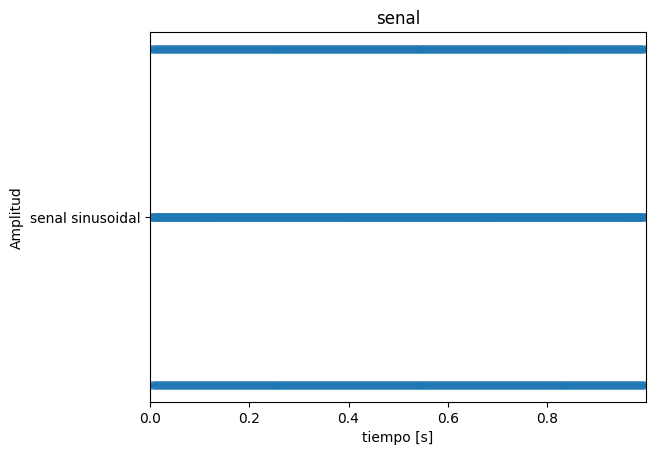

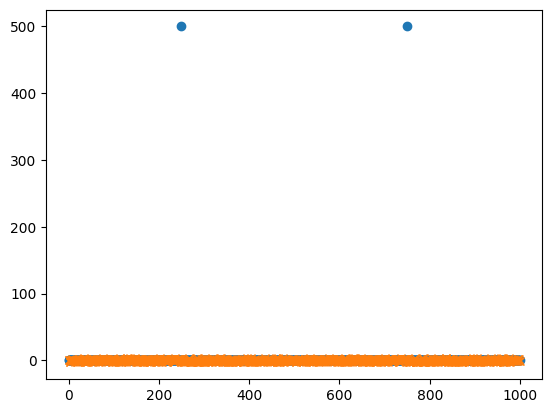

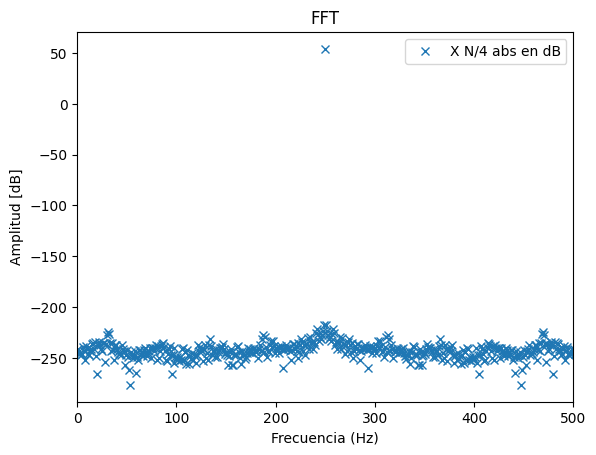

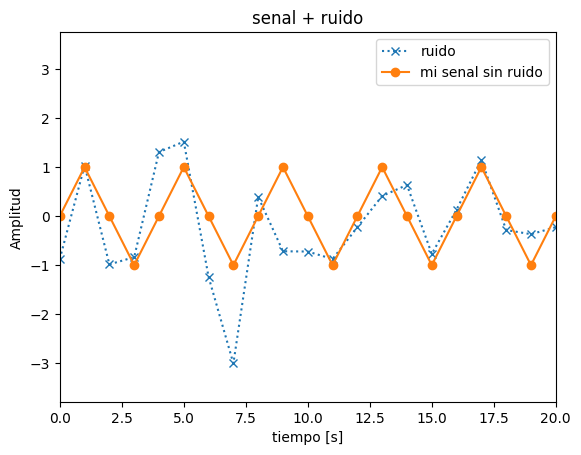

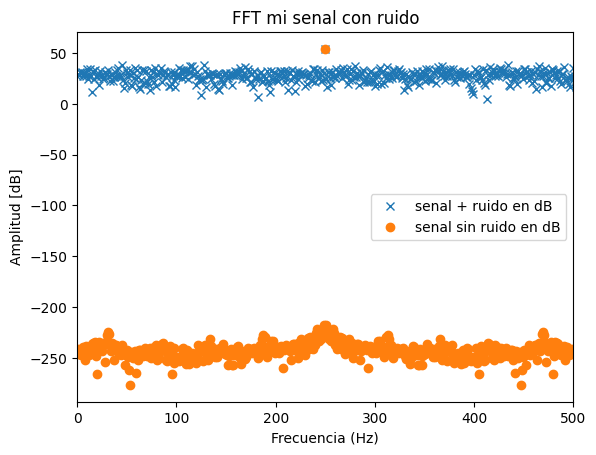

In [8]:
# -*- coding: utf-8 -*-
# %%librerias


import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import fft

# %% Declaracion de variables

N = 1000
fs = N
df = fs / N #resolucion espectral = [[1/(s*muestras)]
ts = 1 / fs
ff = (N/4)*df #eje en frecuencia ==> frecuencia * resolucion espectral
a0=2
snr=3
Omega0=np.pi/2 #fs/4
fr=np.random.uniform(-2,2,None)
Omega1=Omega0+fr*np.pi*2/N

# %% Mi funcion seno


def sen(ff, nn, amp=1, dc=0, ph=0, fs=2):
    N = np.arange(nn)
    t = N / fs
    x = dc + amp * np.sin(2 * np.pi * ff * t + ph)
    return t, x

t1, x1 = sen(ff=(N / 4) * df, nn=N, fs=fs)

plt.figure()
plt.plot(t1,x1,'x', 'senal sinusoidal')
plt.xlim(0, max(t1))
plt.title('senal')
plt.xlabel('tiempo [s]')
plt.ylabel('Amplitud')
plt.show()

# %%Transformadas

# FFTs
X1 = fft(x1)
X1abs = np.abs(X1)
X1ang = np.angle(X1)

plt.figure()
plt.plot(X1abs,'o', label='|X|')
plt.plot(X1ang,'x', label='angulo X')

Ff=np.arange(N)*df #mi eje x en hz
plt.figure()
plt.plot(Ff, 20*np.log10(X1abs), 'x', label='X N/4 abs en dB')
plt.xlim([0, fs/2])
plt.title('FFT')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.show()


#piso de ruido tiene que subir a la potencia que le preestablesco en na

# %% Ruido
def mi_funcion_ruido (t,x,snr,a0):
    dev_std=10**(-(snr-10*np.log10((a0**2)/2)))
    # Ruido Blanco Gaussiano
    ruido = np.random.normal(0, dev_std, size=t.shape)
    # Señal con ruido
    senoidal_ruido = x + ruido
    plt.figure()
    plt.xlim(0,20)
    plt.title('senal + ruido')
    plt.plot(senoidal_ruido,'x:', label='ruido')
    plt.plot(x,'o-', label='mi senal sin ruido')
    plt.xlabel('tiempo [s]')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.show()
    return senoidal_ruido

xr=mi_funcion_ruido(t1,x1,snr,a0)

# FFTs de mi senal con ruido
XR = fft(xr)
XRabs = np.abs(XR)
XRang = np.angle(XR)

Ff=np.arange(N)*df #mi eje x en hz
plt.figure()
plt.plot(Ff, 20*np.log10(XRabs), 'x', label='senal + ruido en dB')
plt.plot(Ff, 20*np.log10(X1abs), 'o', label='senal sin ruido en dB')
plt.xlim([0, fs/2]) 
plt.title('FFT mi senal con ruido')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.show()